In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

In [122]:
## Analysis 

In [851]:
dv = pd.read_csv('data_airbnb_readyforvisuals.csv')

In [852]:
dv.columns

Index(['host_since', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'instant_bookable', 'reviews_per_month', 'n_bathrooms', 'bath_shared',
       'emailhost_verification', 'phonehost_verification',
       'photographerhost_verification', 'work_emailhost_v

We will start with some fundamental ploting and then we will keep moving until we get some juicy interpretation :D

In [853]:
dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 85 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   host_since                                       5914 non-null   object 
 1   host_is_superhost                                5914 non-null   bool   
 2   host_has_profile_pic                             5914 non-null   bool   
 3   host_identity_verified                           5914 non-null   bool   
 4   latitude                                         5914 non-null   float64
 5   longitude                                        5914 non-null   float64
 6   accommodates                                     5914 non-null   int64  
 7   bedrooms                                         5914 non-null   float64
 8   beds                                             5914 non-null   float64
 9   price                         

In [ ]:
# We have to convert some columns again to datetime type, because everytime we export a df, time data types typically require more storage 
# space and therefore may not be as efficient to export and store in files.

In [854]:
dv['host_since']= dv['host_since'].apply(lambda x: pd.to_datetime(x))

In [857]:
dv[['first_review','last_review']]= dv[['first_review','last_review']].apply(lambda x : pd.to_datetime(x))

In [856]:
dv['host_since_year'] = dv['host_since'].dt.year

In [858]:
year_counts = dv['host_since_year'].value_counts()

Text(0.5, 1.0, 'Number of hosts per year of registration')

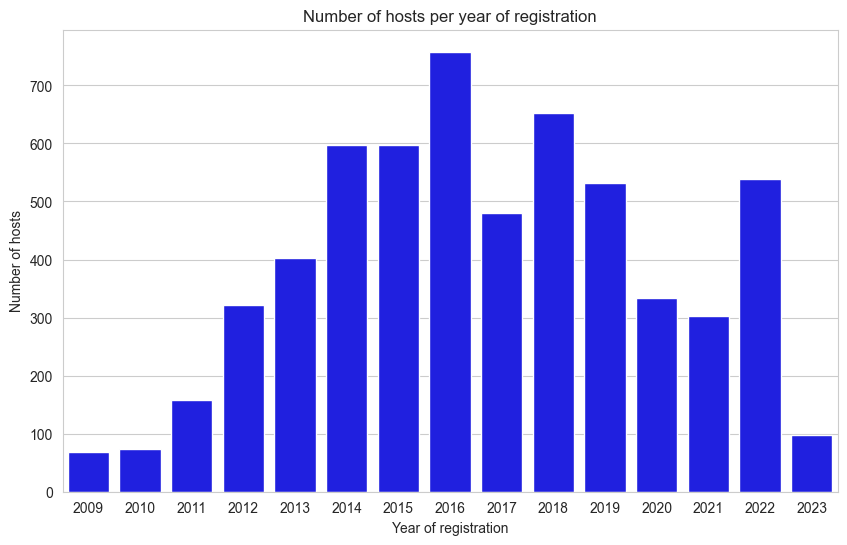

In [859]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(x=year_counts.index, y=year_counts.values, color='blue')
plt.xlabel('Year of registration')
plt.ylabel('Number of hosts')
plt.title('Number of hosts per year of registration')

It appears that due to economic factors and possibly a typical 7-8 year period required for a new business to become fully established, the number of new Airbnb registrations in Canada peaked between 2016 and 2018. It's worth noting that Airbnb first entered the Canadian market in 2009.

In [860]:
dv['host_is_superhost']

0        True
1        True
2       False
3       False
4       False
        ...  
5909    False
5910    False
5911    False
5912    False
5913     True
Name: host_is_superhost, Length: 5914, dtype: bool

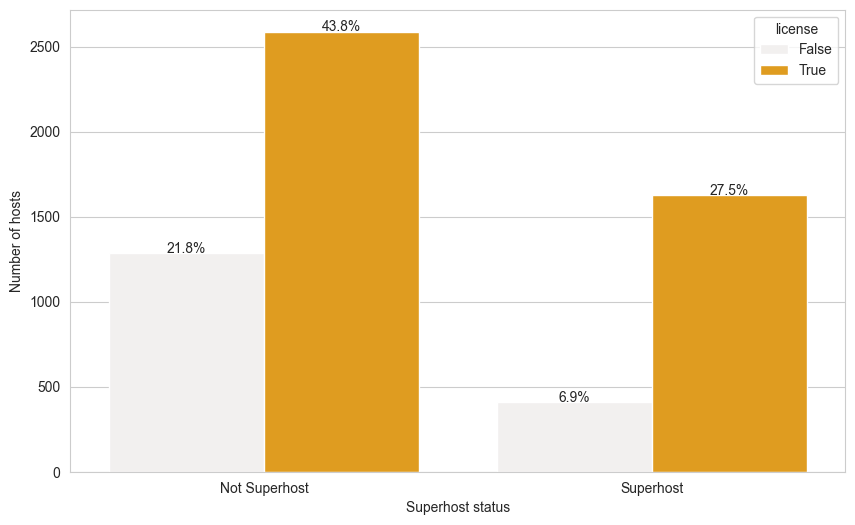

In [862]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='host_is_superhost', data=dv, color='orange', hue='license')
labels = ['Not Superhost', 'Superhost']
plt.xlabel('Superhost status')
plt.ylabel('Number of hosts')
plt.xticks(ticks=[0,1], labels=labels)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1%}'.format(height/total), ha="center")

We can observe that, despite being a super host, a significant proportion of them still lack a stipulated license, and pretty much half of regular host don't have a probe of license. Assuming that all the missing data for some property in column license was because they don't have one to show up.

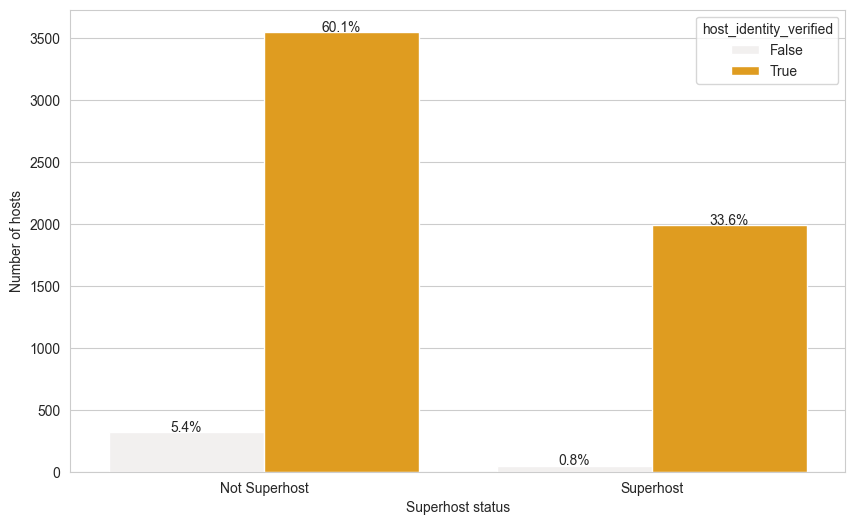

In [863]:
plt.figure(figsize=(10,6))
ax= sns.countplot(x='host_is_superhost', data=dv, color='orange', hue='host_identity_verified')
labels = ['Not Superhost', 'Superhost']
plt.xlabel('Superhost status')
plt.ylabel('Number of hosts')
plt.xticks(ticks=[0,1], labels=labels)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1%}'.format(height/total), ha="center")

Even among Superhosts, we can observe that a significant percentage of them do not possess the required licenses. Furthermore, it is alarming to note that approximately 370 properties are owned by hosts who have not been verified. Personally, I experienced an awkward situation during a previous booking, which led me to report the issue and promptly leave the property.
Lets dig more... 

<Figure size 1000x600 with 0 Axes>

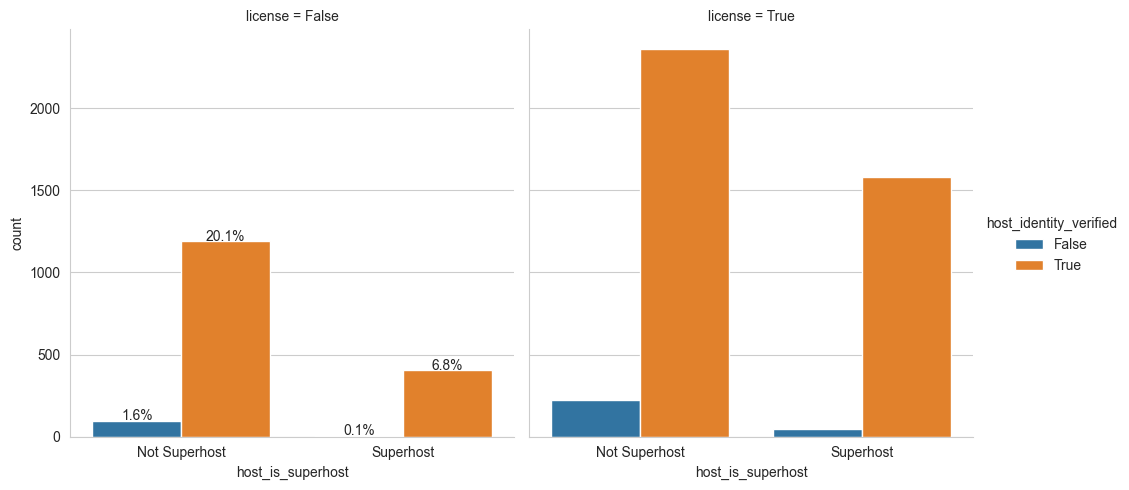

In [893]:
plt.figure(figsize=(10,6))
g= sns.catplot(data=dv, kind="count", x="host_is_superhost", hue="host_identity_verified", col="license")
labels = ['Not Superhost', 'Superhost']
# plt.xlabel('Superhost status')
# plt.ylabel('Number of hosts')
plt.xticks(ticks=[0,1], labels=labels)
ax = g.axes[0,0]
counts = []
for p in ax.patches:
    count = p.get_height()
    percent = count / dv.shape[0] * 100
    counts.append({'count': count, 'percent': percent})
counts = pd.DataFrame(counts)

for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 1, f"{counts.iloc[i]['percent']:.1f}%", ha='center')


Let's raise the alarm and examine the number of hosts who are neither verified nor have a license. About 1.6% fall into this category, which is not an insignificant proportion, Airbnb should set alarms for these extremes categories and do something about it.

Text(0.5, 1.0, 'Distribution of beds')

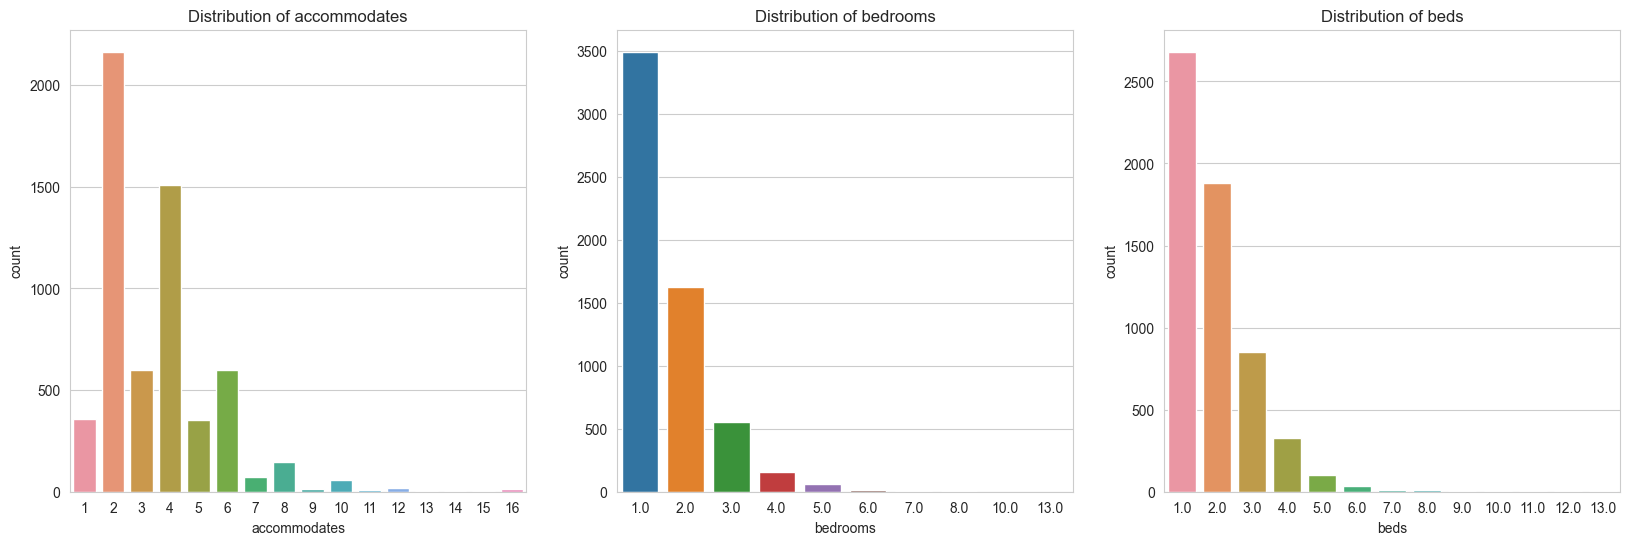

In [894]:
# create a figure with multiple subplots
fig, axs = plt.subplots(ncols=3, figsize=(20, 6))

# plot a countplot for accommodates
sns.countplot(x='accommodates', data=dv, ax=axs[0])
axs[0].set_title('Distribution of accommodates')

# plot a countplot for bedrooms
sns.countplot(x='bedrooms', data=dv, ax=axs[1])
axs[1].set_title('Distribution of bedrooms')

# plot a countplot for beds
sns.countplot(x='beds', data=dv, ax=axs[2])
axs[2].set_title('Distribution of beds')


Most of the properties appear to have the capacity to accommodate up to 6 people, but when we look at the distribution of bedrooms, we can see that the majority of them fall under the first segment, 1-2 bedrooms. This observation is consistent with the third graph, which shows that the majority of properties have 1-2 beds per unit. Additionally, some people may use a sofa as a bed.

(0.0, 1000.0)

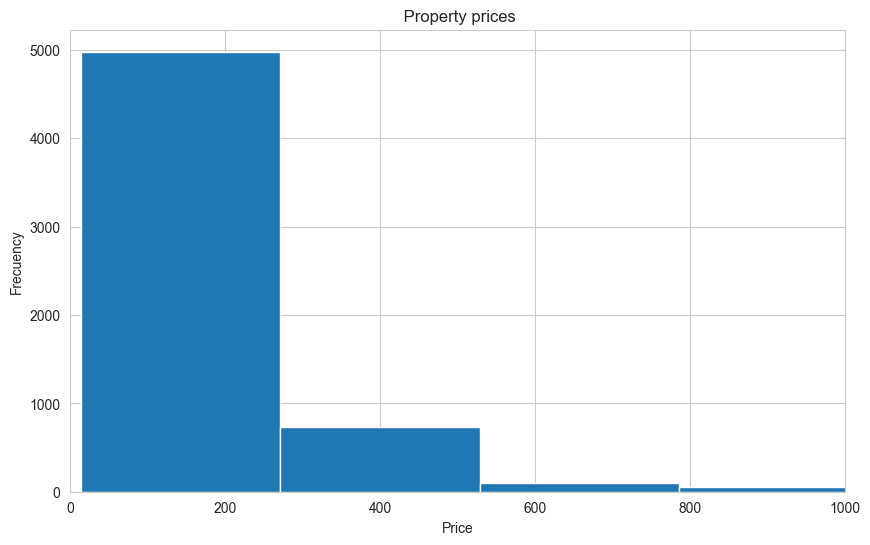

In [895]:
plt.figure(figsize=(10,6))
plt.hist(dv['price'], bins=300)

plt.xlabel('Price')
plt.ylabel('Frecuency')
plt.title(' Property prices')
plt.xlim(0, 1000)



We can find the offer mostly up to 250 , having of course range above that, but let see how prices are set through differents neighbourhood 

(0.0, 1000.0)

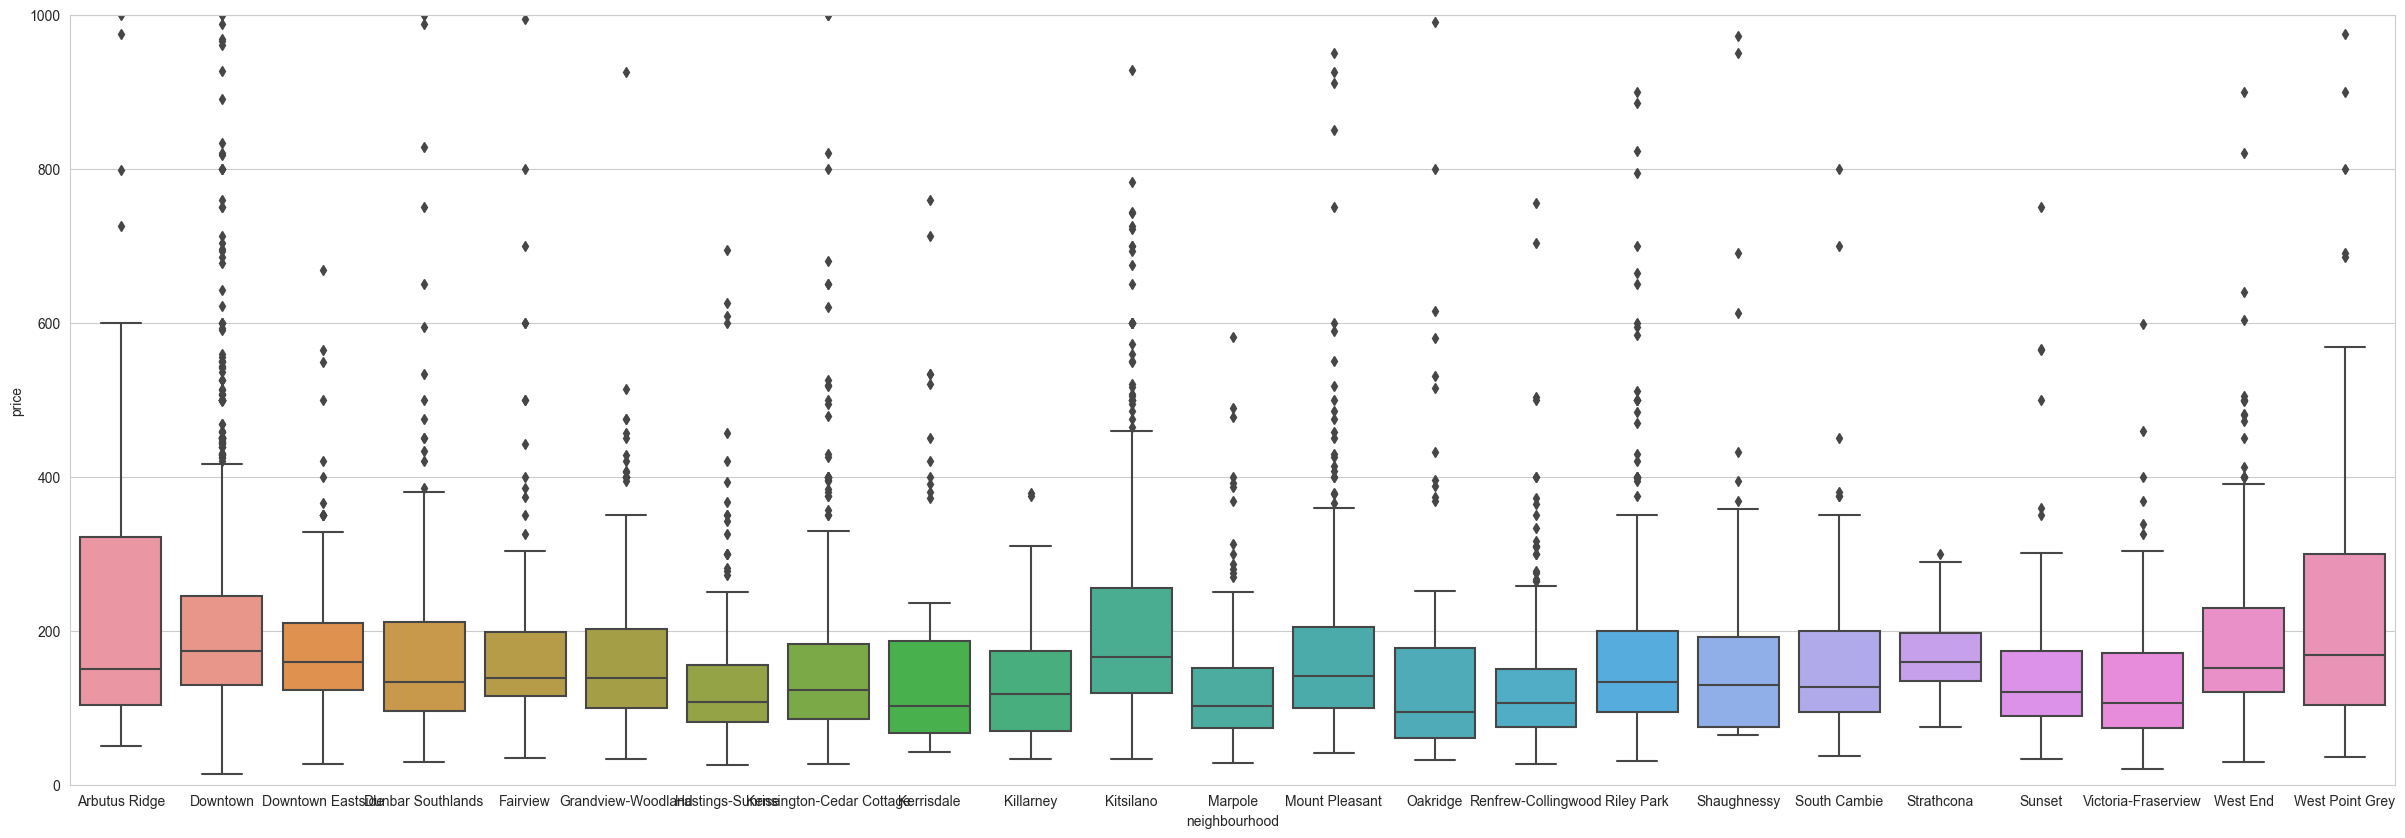

In [896]:
# Crea una lista con los nombres de las columnas de las dummies que quieres utilizar
neighbour_cols = ['neighbourhood_cleansed_Arbutus Ridge', 'neighbourhood_cleansed_Downtown', 'neighbourhood_cleansed_Downtown Eastside', 'neighbourhood_cleansed_Dunbar Southlands', 'neighbourhood_cleansed_Fairview', 'neighbourhood_cleansed_Grandview-Woodland', 'neighbourhood_cleansed_Hastings-Sunrise', 'neighbourhood_cleansed_Kensington-Cedar Cottage', 'neighbourhood_cleansed_Kerrisdale', 'neighbourhood_cleansed_Killarney', 'neighbourhood_cleansed_Kitsilano', 'neighbourhood_cleansed_Marpole', 'neighbourhood_cleansed_Mount Pleasant', 'neighbourhood_cleansed_Oakridge', 'neighbourhood_cleansed_Renfrew-Collingwood', 'neighbourhood_cleansed_Riley Park', 'neighbourhood_cleansed_Shaughnessy', 'neighbourhood_cleansed_South Cambie', 'neighbourhood_cleansed_Strathcona', 'neighbourhood_cleansed_Sunset', 'neighbourhood_cleansed_Victoria-Fraserview', 'neighbourhood_cleansed_West End', 'neighbourhood_cleansed_West Point Grey']
plt.figure(figsize=(30,10))

# Crea un DataFrame solo con las columnas de interés
df_boxplot = dv[['price'] + neighbour_cols]

# Utiliza el método melt para transformar las columnas de dummies en una única columna
df_boxplot_melted = df_boxplot.melt(id_vars=['price'], value_vars=neighbour_cols, var_name='neighbourhood', value_name='dummy')

# Filtra las filas donde la variable dummy es igual a 1
df_boxplot_melted = df_boxplot_melted[df_boxplot_melted['dummy'] == 1]

df_boxplot_melted["neighbourhood"] = df_boxplot_melted["neighbourhood"].apply(lambda x: x.replace("neighbourhood_cleansed_", ""))

# Crea el boxplot utilizando seaborn
sns.boxplot(x='neighbourhood', y='price', data=df_boxplot_melted)

plt.ylim(0,1000)





We can se that Arbutus Ridge, have the most high range of price of the data, following close by West Point Grey but if we look at Downtown the range of price seems to be more uniform even if we have a lot of points out of range, probably pointing at some exlusive suites.

In [ ]:
#We will set a new bookings colum, refering how booked have been every property multiplying the mininum nights for the number of total reviews. 

In [908]:
dv['bookings'] = dv['number_of_reviews'] * dv['minimum_nights']

In [909]:
df_boxplot2 = dv[['bookings'] + neighbour_cols]

In [910]:
df_boxplot_melted2 = df_boxplot2.melt(id_vars=['bookings'], value_vars=neighbour_cols, var_name='neighbourhood', value_name='dummy')

In [911]:
df_boxplot_melted2 = df_boxplot_melted2[df_boxplot_melted2['dummy'] == 1]

In [912]:
df_boxplot_melted2["neighbourhood"] = df_boxplot_melted2["neighbourhood"].apply(lambda x: x.replace("neighbourhood_cleansed_", ""))

In [913]:
df_group_neighbour = df_boxplot_melted2.groupby('neighbourhood').sum().reset_index()

In [914]:
df_group_neighbour.drop('dummy',axis=1, inplace=True)

In [915]:
df_group_neighbour['neighbourhood'] = df_group_neighbour['neighbourhood'].apply(lambda x: x.replace("Dunbar Southlands", "Dunbar-Southlands"))

In [916]:
df_group_neighbour['neighbourhood'] = df_group_neighbour['neighbourhood'].apply(lambda x: x.replace("Arbutus Ridge", "Arbutus-Ridge"))

In [917]:
df_group_neighbour

neighbourhood  bookings
0         Arbutus-Ridge     13247
1              Downtown    503440
2     Downtown Eastside    125706
3     Dunbar-Southlands     19582
4              Fairview     56523
..                  ...       ...
18           Strathcona      7488
19               Sunset     17946
20  Victoria-Fraserview     24072
21             West End    191582
22      West Point Grey     16330

[23 rows x 2 columns]

In [1017]:
import json
with open('local-area-boundary.geojson') as f:
    neighbourhoods_geojson = json.load(f)

    vancouver_map = folium.Map(location=[49.246292, -123.116226], zoom_start=12)

folium.Choropleth(
    geo_data=neighbourhoods_geojson,
    name='choropleth',
    data=df_group_neighbour,
    columns=['neighbourhood', 'bookings'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of reservations by neighborhood in Vancouver'
).add_to(vancouver_map)

folium.LayerControl().add_to(vancouver_map)

vancouver_map.save('booking_per_neighbour.html')

You can verify the generated HTML file in the directory to observe the interactive feature that displays the most in-demand neighborhoods. However, with the aid of the heatmap, it becomes apparent that downtown is the location that receives the majority of reservations.

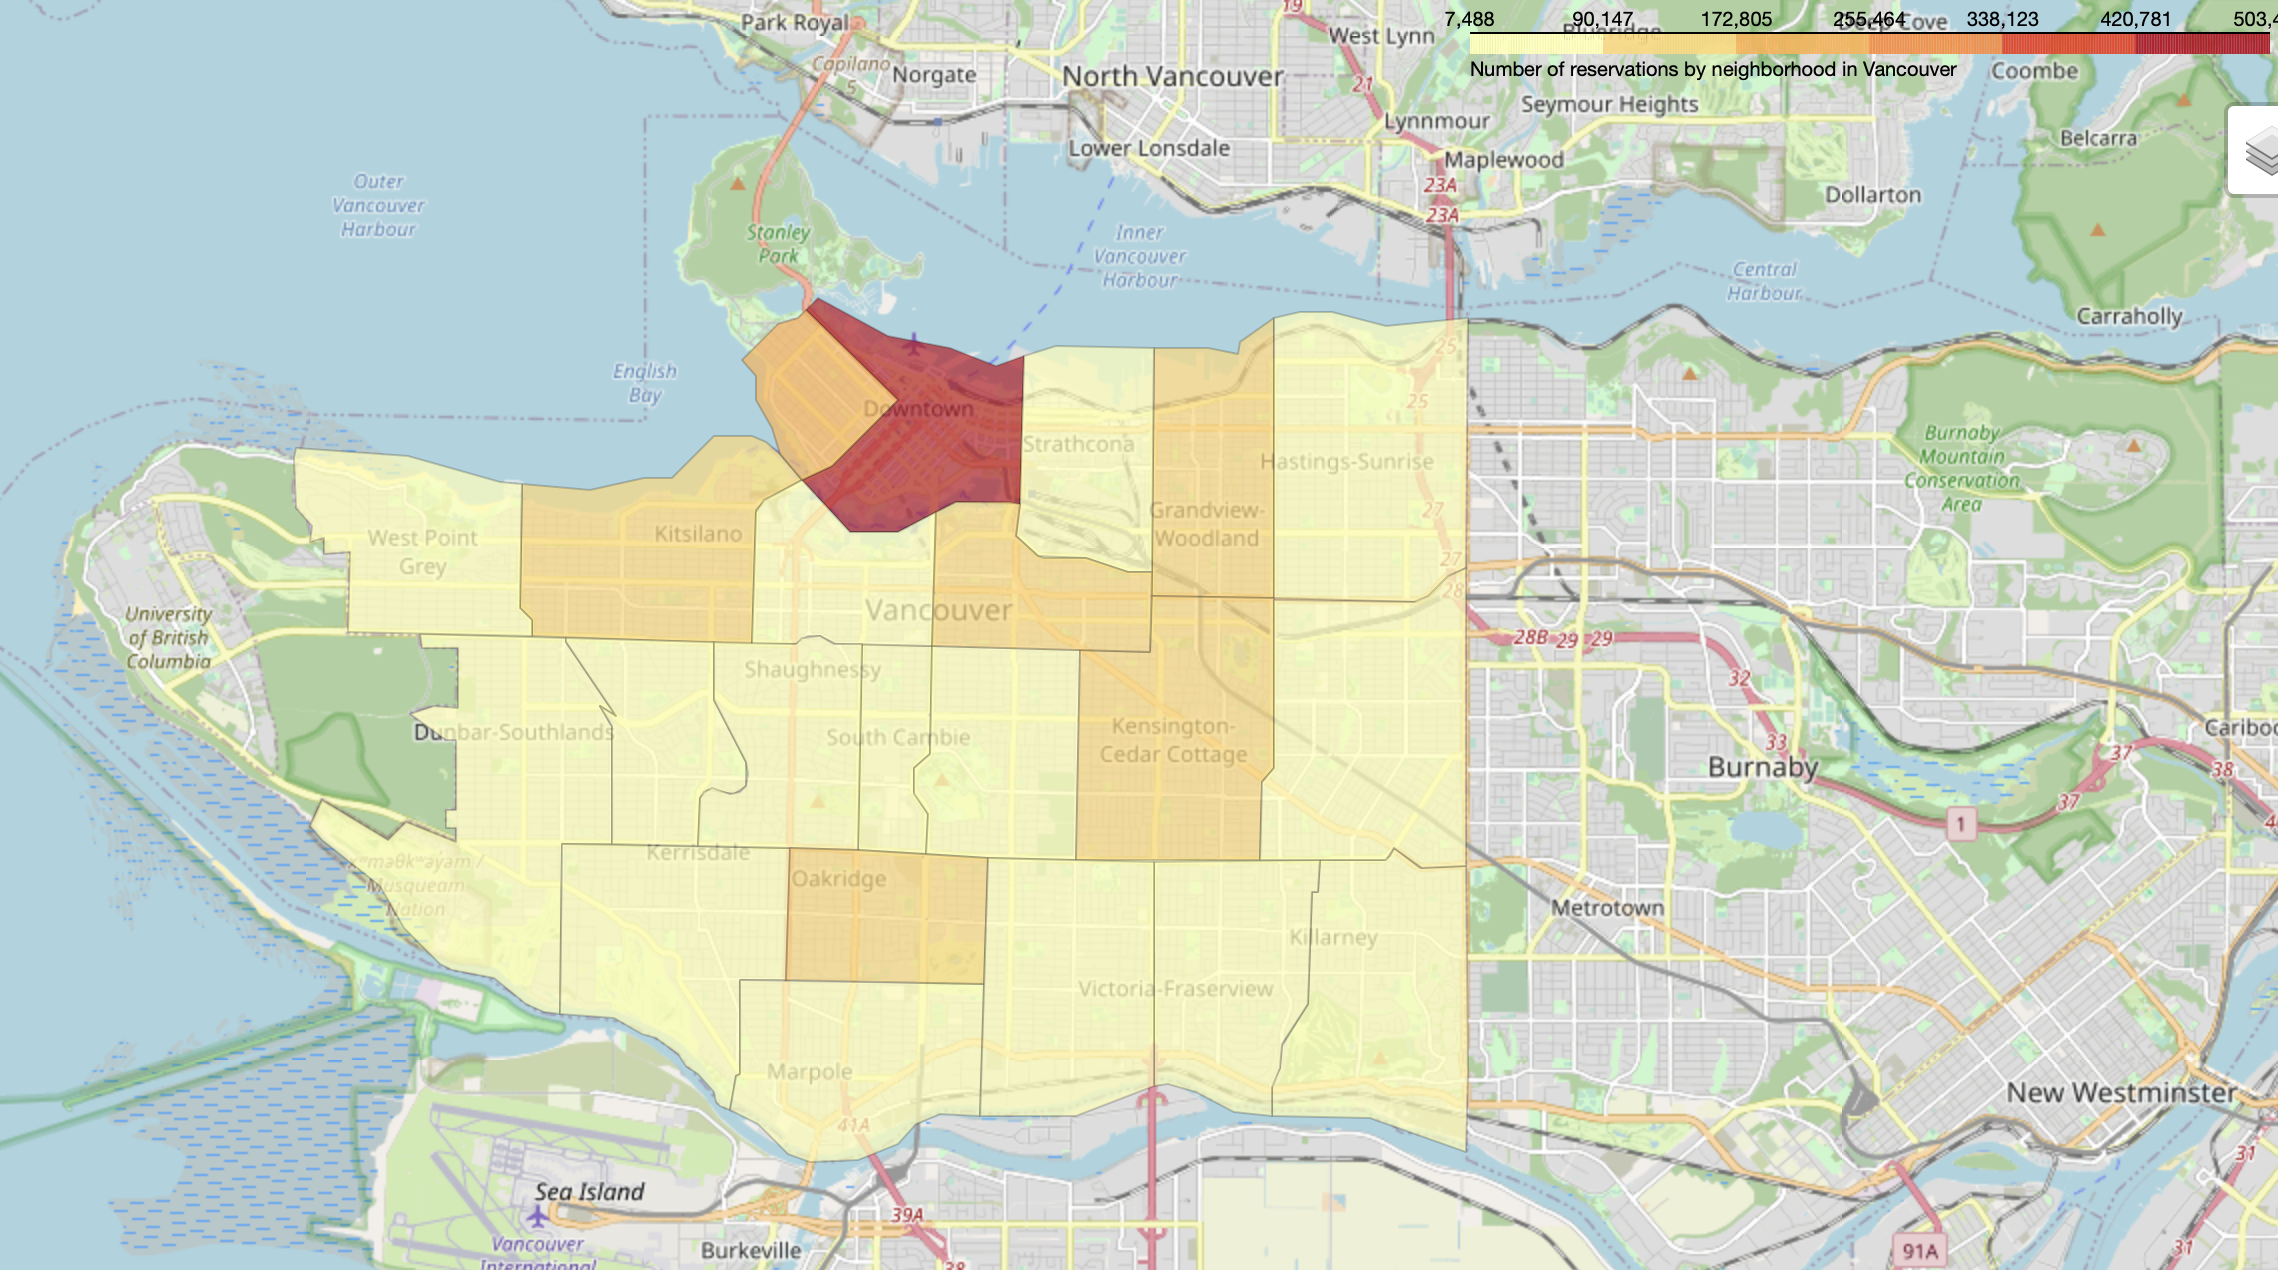

In [1032]:
df_boxplot2 = dv[['review_scores_rating'] + neighbour_cols]
df_boxplot_melted2 = df_boxplot2.melt(id_vars=['review_scores_rating'], value_vars=neighbour_cols, var_name='neighbourhood', value_name='dummy')
df_boxplot_melted2 = df_boxplot_melted2[df_boxplot_melted2['dummy'] == 1]
df_boxplot_melted2["neighbourhood"] = df_boxplot_melted2["neighbourhood"].apply(lambda x: x.replace("neighbourhood_cleansed_", ""))
df_group_neighbour2 = df_boxplot_melted2.groupby('neighbourhood').mean().reset_index()
df_group_neighbour2.drop('dummy',axis=1, inplace=True)
df_group_neighbour2['neighbourhood'] = df_group_neighbour2['neighbourhood'].apply(lambda x: x.replace("Dunbar Southlands", "Dunbar-Southlands"))
df_group_neighbour2['neighbourhood'] = df_group_neighbour2['neighbourhood'].apply(lambda x: x.replace("Arbutus Ridge", "Arbutus-Ridge"))

neighbourhood  review_scores_rating
0         Arbutus-Ridge              4.045823
1              Downtown              3.909246
2     Downtown Eastside              4.153516
3     Dunbar-Southlands              3.586121
4              Fairview              3.747682
..                  ...                   ...
18           Strathcona              4.296000
19               Sunset              4.099292
20  Victoria-Fraserview              3.603235
21             West End              3.464511
22      West Point Grey              3.434737

[23 rows x 2 columns]

In [1079]:
import json

with open('local-area-boundary.geojson') as f:
    neighbourhoods_geojson = json.load(f)

vancouver_map = folium.Map(location=[49.246292, -123.116226], zoom_start=12)
folium.Choropleth(
    geo_data=neighbourhoods_geojson,
    name='choropleth',
    data=df_group_neighbour2,
    columns=['neighbourhood', 'review_scores_rating'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Review Rating by neighborhood in Vancouver',
    invert_scale=True
).add_to(vancouver_map)

folium.LayerControl().add_to(vancouver_map)

vancouver_map.save('review_per_neighbour.html')

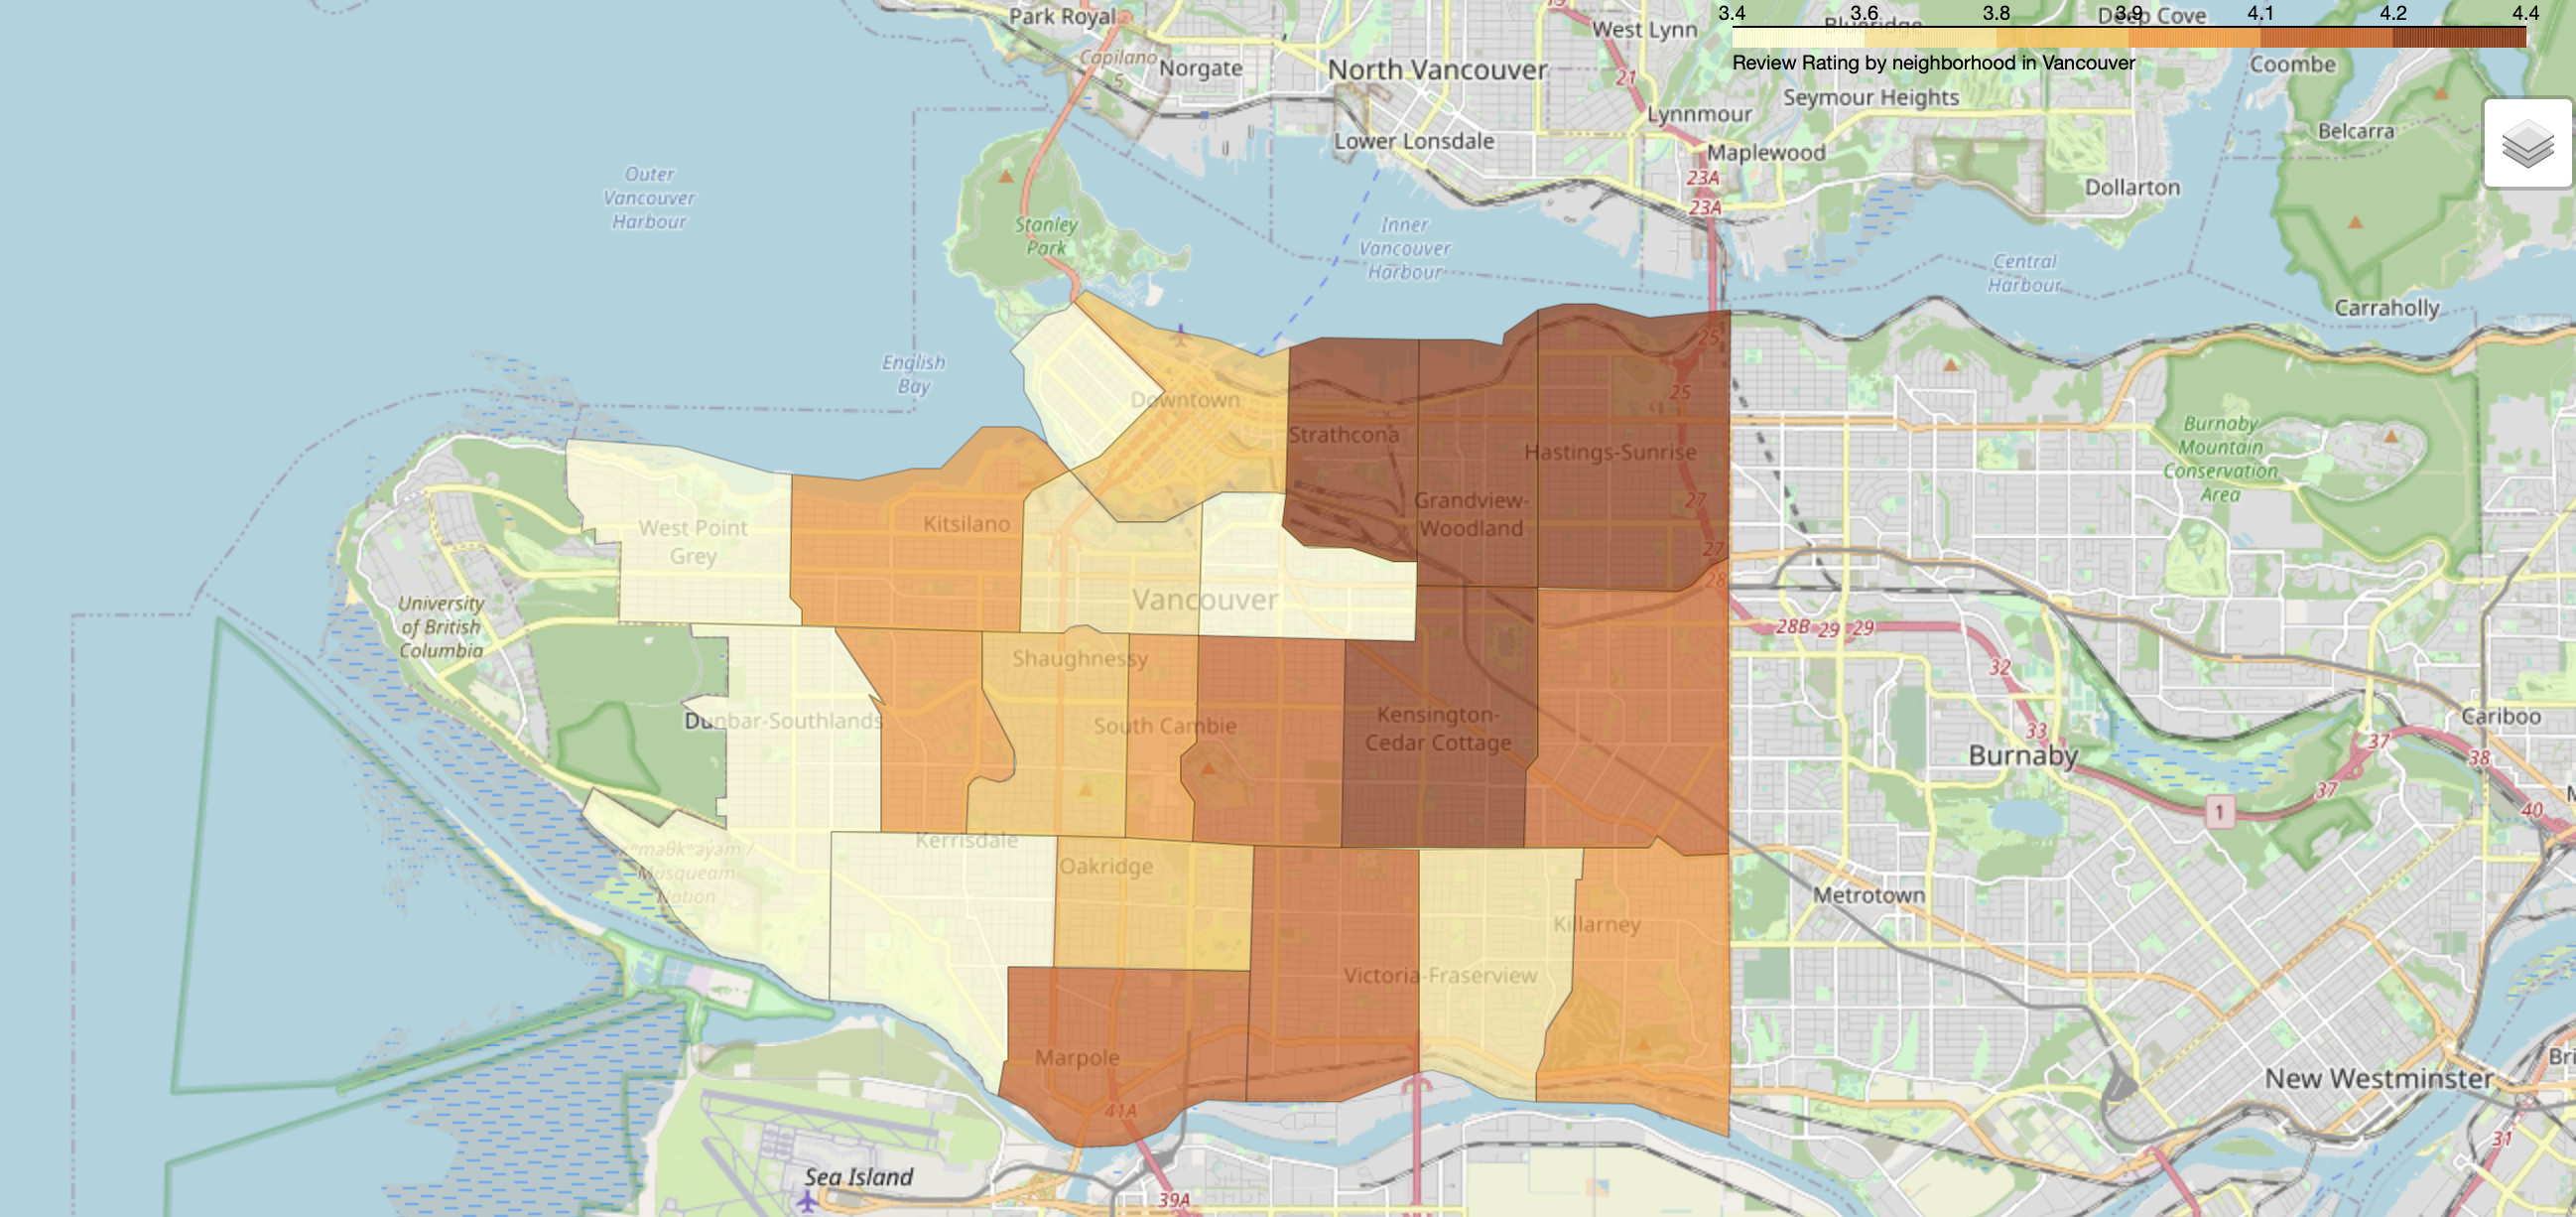

So the better neighbourhood raiting are close to the inner Vancouver Harbour and neighbourhood close to University Columbia are in the bottom of raiting score. Lets check whhy are they failing.

In [1217]:
review_cols = [col for col in dv.columns if col.startswith('review_scores_')]

In [1218]:
stack_cols = ['neighbourhood_cleansed_West Point Grey','neighbourhood_cleansed_Dunbar Southlands','neighbourhood_cleansed_Kerrisdale']

In [1219]:
df_hist = dv[stack_cols + review_cols]

In [1221]:
df_hist_melted = df_hist.melt(id_vars=stack_cols, value_vars=review_cols, var_name='review_cols', value_name='score')

In [1223]:
df_hist_melted['neighbourhood'] = 0

In [1224]:
df_hist_melted.loc[df_hist_melted['neighbourhood_cleansed_West Point Grey'] == True, 'neighbourhood'] = 'West Point Grey'
df_hist_melted.loc[df_hist_melted['neighbourhood_cleansed_Dunbar Southlands'] == True, 'neighbourhood'] = 'Dunbar Southlands'
df_hist_melted.loc[df_hist_melted['neighbourhood_cleansed_Kerrisdale'] == True, 'neighbourhood'] = 'Kerrisdale'

In [1225]:
df_hist_melted.drop(['neighbourhood_cleansed_West Point Grey','neighbourhood_cleansed_Dunbar Southlands','neighbourhood_cleansed_Kerrisdale'], axis=1,inplace= True )

In [1226]:
df_hist_melted = df_hist_melted[df_hist_melted['neighbourhood'] != 0]

In [1243]:
df_plot= df_hist_melted.groupby(['review_cols','neighbourhood']).mean()

In [1246]:
df_plot = df_plot.reset_index()

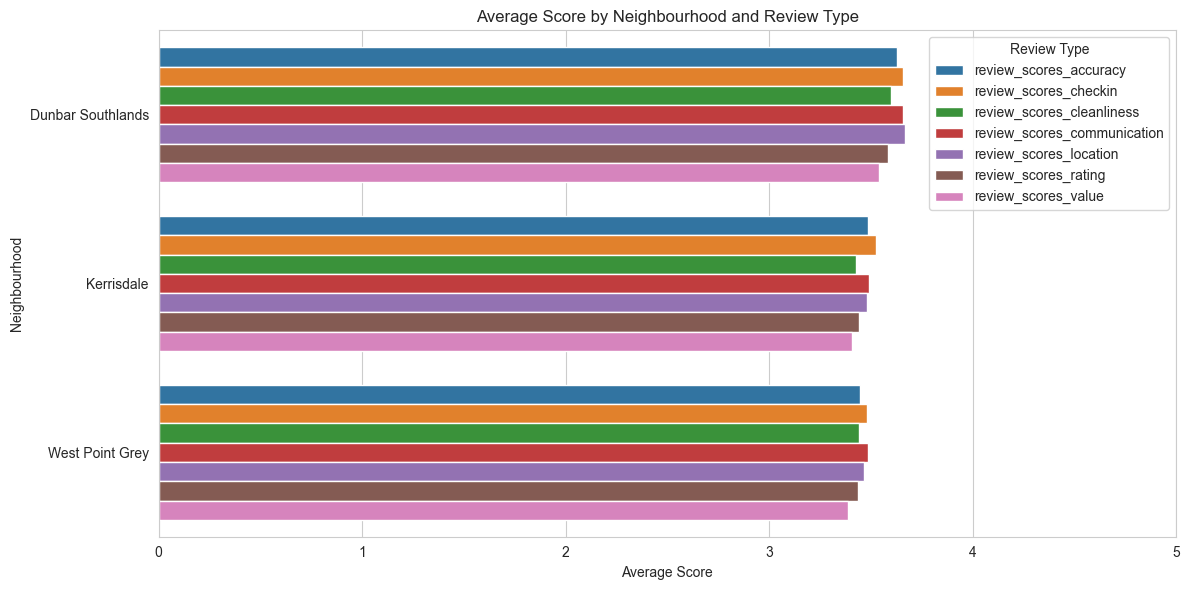

In [1254]:
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='neighbourhood', hue='review_cols', data=df_plot)
plt.xlabel('Average Score')
plt.xlim(0,5)
plt.ylabel('Neighbourhood')
plt.title('Average Score by Neighbourhood and Review Type')
plt.legend(title='Review Type')
plt.tight_layout()

There is a perception among people that the value they receive for the price they pay is not satisfactory, with cleanliness being one of the aspects contributing to this sentiment, as it is rated relatively low. Exploring the written reviews left by guests would be fascinating to gain insights into why they believe they are not getting adequate value for their money. These neighborhoods are known for their upscale nature and advantageous features like proximity to the beach and a central location, making it even more intriguing to delve into the underlying reasons behind these perceptions.

In [ ]:
#I did this function just to compare the name of the neighbours of the json provided from canada goverment with the dataframe,  
# so it match exactly with the data frame name 
# neighbourhood_names = []
# for feature in neighbourhoods_geojson['features']:
#     neighbourhood_names.append(feature['properties']['name'])


# df_neighbourhood_names = df_group_neighbour['neighbourhood']
# df_neighbourhood_names= df_neighbourhood_names.tolist()
    

# for name in neighbourhood_names:
#     if name not in df_neighbourhood_names:
#         print(f'The neighbourd {name} is not in the  DataFrame')

In [ ]:
#Response time

In [921]:
# host_response_cols = df.filter(like='host_response_time').columns
host_response_cols = [col for col in dv.columns if col.startswith('host_response_time')]


In [922]:
df_hist = dv[['price'] + host_response_cols]

In [923]:
df_hist_melted = df_hist.melt(id_vars=['price'], value_vars=host_response_cols, var_name='response time', value_name='dummy')


In [924]:
df_hist_melted = df_hist_melted[df_hist_melted['dummy'] == 1]

In [925]:
df_hist_melted['response time'] = df_hist_melted['response time'].apply(lambda x: x.replace("host_response_time_", ""))

In [926]:
df_hist_melted

price   response time  dummy
2      150.0     Unspecified   True
4      350.0     Unspecified   True
6      195.0     Unspecified   True
7       94.0     Unspecified   True
8      150.0     Unspecified   True
...      ...             ...    ...
29562  380.0  within an hour   True
29564   87.0  within an hour   True
29566  120.0  within an hour   True
29567  339.0  within an hour   True
29569  201.0  within an hour   True

[5914 rows x 3 columns]

Text(0.5, 0, 'Host Response Group')

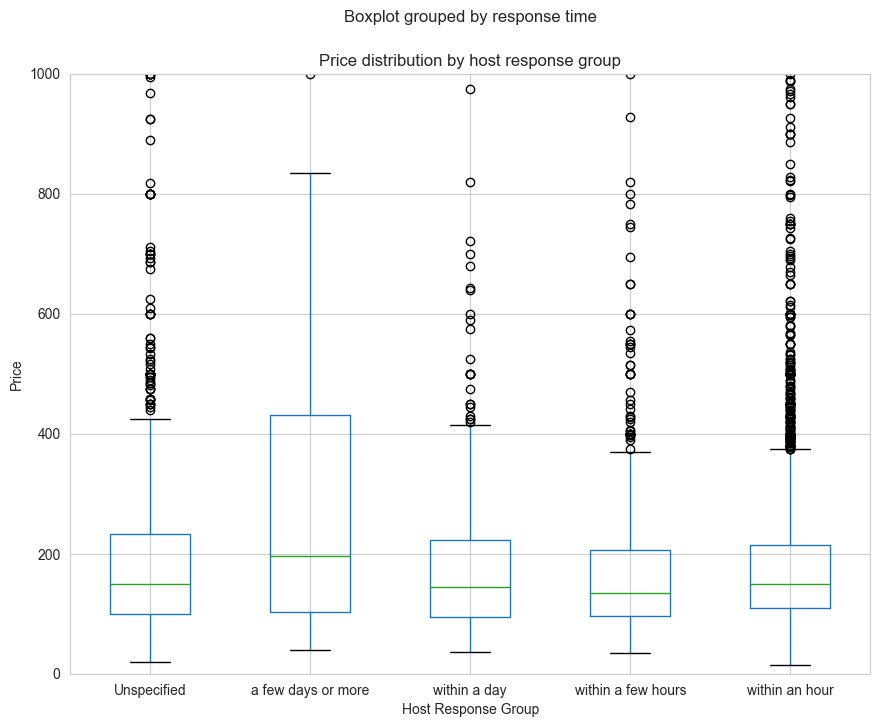

In [927]:
df_hist_melted.boxplot(column='price',by='response time' ,figsize=(10, 8))
plt.title('Price distribution by host response group')
plt.ylim(0,1000)
plt.ylabel('Price')
plt.xlabel('Host Response Group')


With this boxplot we can see that the category of response time 'a few days or more' have the biggest distribution of prices, perhaps we are seeing a trend that at higher prices, it could mean more exclusive properties and the owners of these properties may not be as concerned about maintaining their Airbnb business. Specifically, they may have less pressure to respond quickly to guest inquiries if they are not relying on property rentals to stay afloat financially. Let keep digging into this just for fun 

We will perform a ANOVA too see if the difference of price between category are significantly relevant and see what our F and p value indicates 

In [928]:
from scipy.stats import f_oneway


In [929]:
response1_prices = df_hist_melted[df_hist_melted['response time'] == 'within an hour']['price']
response2_prices = df_hist_melted[df_hist_melted['response time'] == 'within a few hours']['price']
response3_prices = df_hist_melted[df_hist_melted['response time'] == 'within a day']['price']
response4_prices = df_hist_melted[df_hist_melted['response time'] == 'a few days or more']['price']
response4_prices= df_hist_melted[df_hist_melted['response time'] == 'Unspecified']['price']

In [930]:
f, p = f_oneway(response1_prices, response2_prices, response3_prices, response4_prices)
print('F-value:', f)
print('p-value:', p)

F-value: 4.350215269174712
p-value: 0.004556950447282833


The F-value is a measure of the variation between group means divided by the variation within groups. The higher the F-value, the greater the difference between group means and the more likely it is that at least one group is significantly different from the others.
This allow us to go further and perform a post-hoc, like Tukey HSD

In [605]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(df_hist_melted['price'], df_hist_melted['response time'], alpha=0.05)

print(tukey_results)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
      group1             group2        meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------------------
       Unspecified a few days or more  130.0525 0.8085 -193.5983 453.7033  False
       Unspecified       within a day   214.038 0.0171   25.0897 402.9863   True
       Unspecified within a few hours  -12.0251 0.9992 -147.8438 123.7935  False
       Unspecified     within an hour   -15.573  0.994 -119.0354  87.8895  False
a few days or more       within a day   83.9855 0.9666 -268.2188 436.1899  False
a few days or more within a few hours -142.0776 0.7593 -468.8698 184.7146  False
a few days or more     within an hour -145.6254 0.7143  -460.349 169.0981  False
      within a day within a few hours -226.0631 0.0131 -420.3433 -31.7829   True
      within a day     within an hour  -229.611 0.0028 -402.8235 -56.3985   True
within a few hours     withi

With an alpha significance of 0.05, we can conclude that there is no significant difference in prices between the response category 'a few days or more' and the other categories. Therefore, we cannot state that the response time 'a few days or more' is related to the highest price range, but was fun to dig into what maybe a visualization can presume.

In [931]:
#Reviews

Let us now examine how varying response times can impact higher ratings for the same subject.

In [609]:
df_hist_commu = dfa[['review_scores_communication'] + host_response_cols]

In [611]:
df_hist_commu =df_hist.melt(id_vars=['review_scores_communication'], value_vars=host_response_cols, var_name='response time', value_name='dummy')

In [618]:
df_hist_commu = df_hist_commu[df_hist_commu['dummy'] == 1]
df_hist_commu['response time'] = df_hist_commu['response time'].apply(lambda x: x.replace("host_response_time_", ""))
df_hist_commu.drop('dummy', axis=1, inplace=True)

Text(0, 0.5, 'Score raiting')

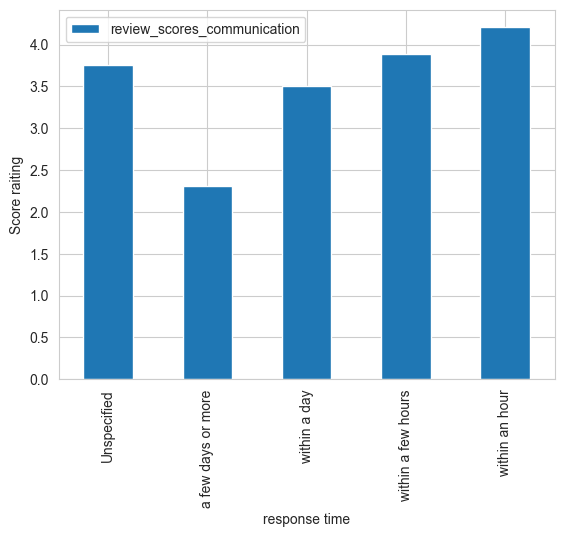

In [657]:
df_hist_commu.groupby('response time').mean().plot(kind='bar')
plt.ylabel('Score raiting')

It is reasonable to assume that a faster response time will have a positive effect on how the service is perceived and, in turn, result in a higher rating. However, we should disregard the "unspecified" category since we cannot determine why this data is missing. It could be an error in the platform's categorization process.

In [ ]:
#Instant Booking

Each host has the option to enable "instant booking" mode for their property. This means that the reservation can be made directly by the guest without being filtered by the host and can be booked immediately after the client confirms it.

In [937]:
raitings = [ col for col in dv.columns if col.startswith('review_scores_')]

In [938]:
dv['instant_bookable'].value_counts()

instant_bookable
False    4459
True     1455
Name: count, dtype: int64

<Axes: xlabel='instant_bookable', ylabel='count'>

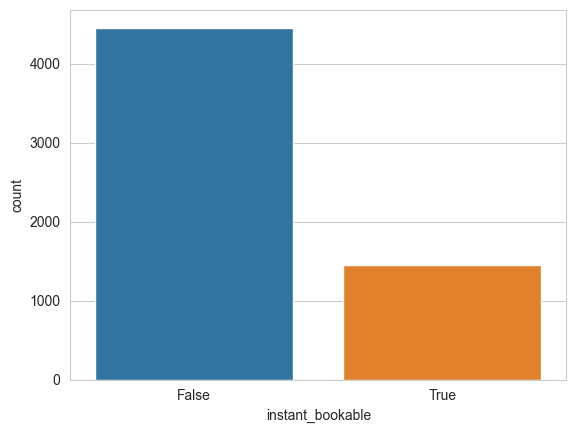

In [939]:
sns.countplot(x='instant_bookable', data=dv)

It appears that roughly 20% of the properties allow instant booking. This may be due to the fact that enabling this feature requires better logistics and management of all aspects of renting a unit.

Text(0.5, 1.0, 'Range of price if the property is bookable')

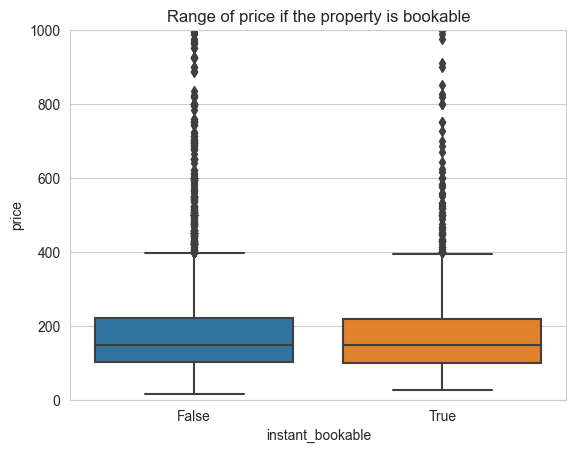

In [658]:
sns.boxplot(x='instant_bookable', y='price', data=dfa)
plt.ylim(0,1000)
plt.title('Range of price if the property is bookable')

One might assume that offering instant booking would result in higher prices, but this does not seem to be the case based on the price range of instant bookable properties vs normal booking.

When a property is listed as automatically bookable, it implies that it doesn't require any host approval before being booked. This leads me to wonder about the cleaning arrangements for such properties. Let's explore whether this factor has any impact.

Text(0.5, 1.0, '')

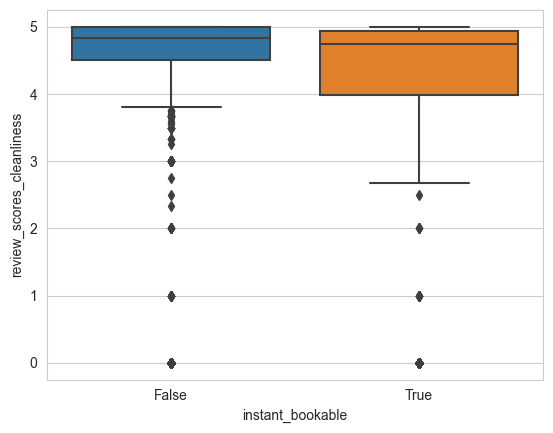

In [940]:
sns.boxplot(x='instant_bookable', y='review_scores_cleanliness', data=dv)
plt.title('')

My initial thoughts were not so wrong. The data shows that the cleanliness score rating for instant bookable properties has a wider range of lower values. This suggests that the cleaning process for these types of properties should be more rigorous, as they are expected to accommodate guests at any time without prior host approval.

In [ ]:
#Amenities

Let see how the chosen amenities from our NLP section impact in some form our data and thoughts.

In [941]:
amenities_col= [col for col in dv.columns if col.endswith("_amenitie")]

In [942]:
df_amenities_col = dfa[['price'] + amenities_col]

In [943]:
amenity_percents =df_amenities_col.drop('price',axis=1).sum()/len(dfa)*100

In [944]:
amenity_percents

alarm_amenitie       96.432195
dryer_amenitie       92.374028
parking_amenitie     88.586405
water_amenitie       82.042611
coffee_amenitie      73.097734
material_amenitie    14.846128
grill_amenitie       18.143389
wine_amenitie        40.547853
backyard_amenitie    29.506256
pool_amenitie        15.843761
dtype: float64

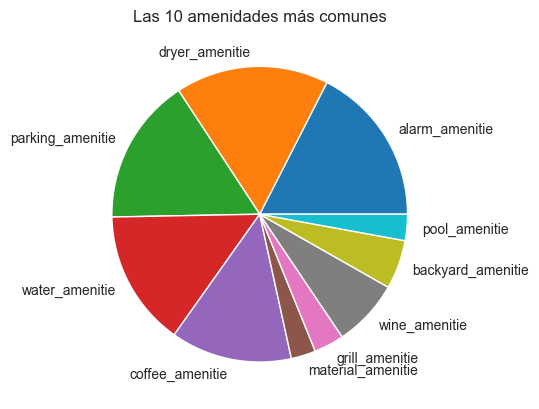

In [992]:
plt.pie(amenity_percents, labels=amenity_percents.index)
plt.title('The 10 most common amenities')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'alarm_amenitie'),
  Text(1, 0, 'dryer_amenitie'),
  Text(2, 0, 'parking_amenitie'),
  Text(3, 0, 'water_amenitie'),
  Text(4, 0, 'coffee_amenitie'),
  Text(5, 0, 'material_amenitie'),
  Text(6, 0, 'grill_amenitie'),
  Text(7, 0, 'wine_amenitie'),
  Text(8, 0, 'backyard_amenitie'),
  Text(9, 0, 'pool_amenitie')])

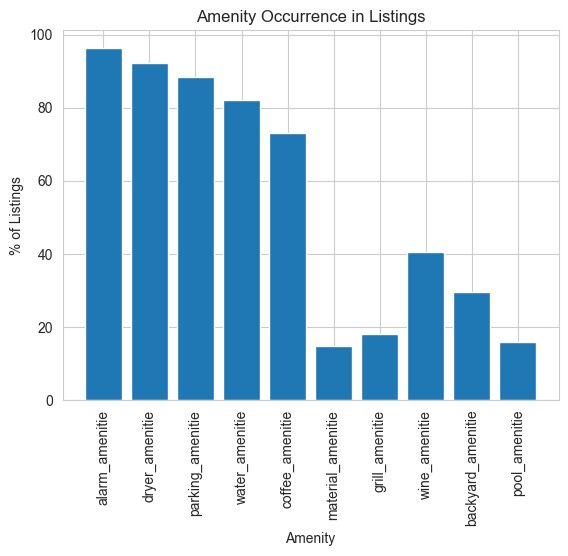

In [945]:
#other way to look at it 
fig, ax = plt.subplots()
ax.bar(amenity_percents.index, amenity_percents)
ax.set_xlabel('Amenity')
ax.set_ylabel('% of Listings')
ax.set_title('Amenity Occurrence in Listings')
plt.xticks(rotation=90)

We can see that grill, material and pool amenities are the less offered into all the dataset of properties, 
with:
grill = BBQ, material = reading material and pool = swimming pool.

Alarm seems to be almost in the 100% of the properties. You can check the list of amenities that we calculated in the NLP of this project.

Lets check if ofering grill and pool make some difference in terms of booking/price 

In [964]:
mask = (dv['pool_amenitie'] == 1)
mask2 =  (dfa['pool_amenitie'] == 0)
bookings_amenities = dv.loc[mask, 'bookings'].mean()
bookings_withoutamenities= dv.loc[mask2, 'bookings'].mean()
bookings_all = dv['bookings'].mean()

Text(0, 0.5, 'reservations')

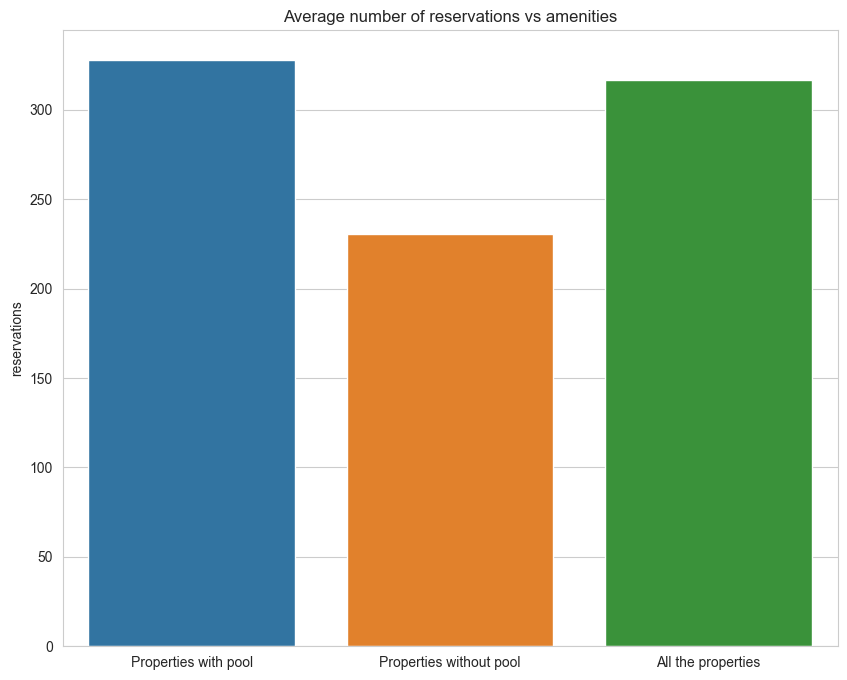

In [969]:
bookings_values = [bookings_amenities,bookings_withoutamenities, bookings_all]


bookings_labels = ['Properties with pool','Properties without pool', 'All the properties']
plt.figure(figsize=(10,8))
sns.barplot(x=bookings_labels, y=bookings_values)
plt.title("Average number of reservations vs amenities")
plt.ylabel("reservations")

It appears that having a pool does not seem to increase the number of bookings for properties.

Let see how it impacts having something more essential as it has become to have parking

In [965]:
mask = (dv['parking_amenitie'] == 1)
mask2 =  (dfa['parking_amenitie'] == 0)
bookings_amenities = dv.loc[mask, 'bookings'].mean()
bookings_withoutamenities= dv.loc[mask2, 'bookings'].mean()
bookings_all = dv['bookings'].mean()

Text(0, 0.5, 'reservations')

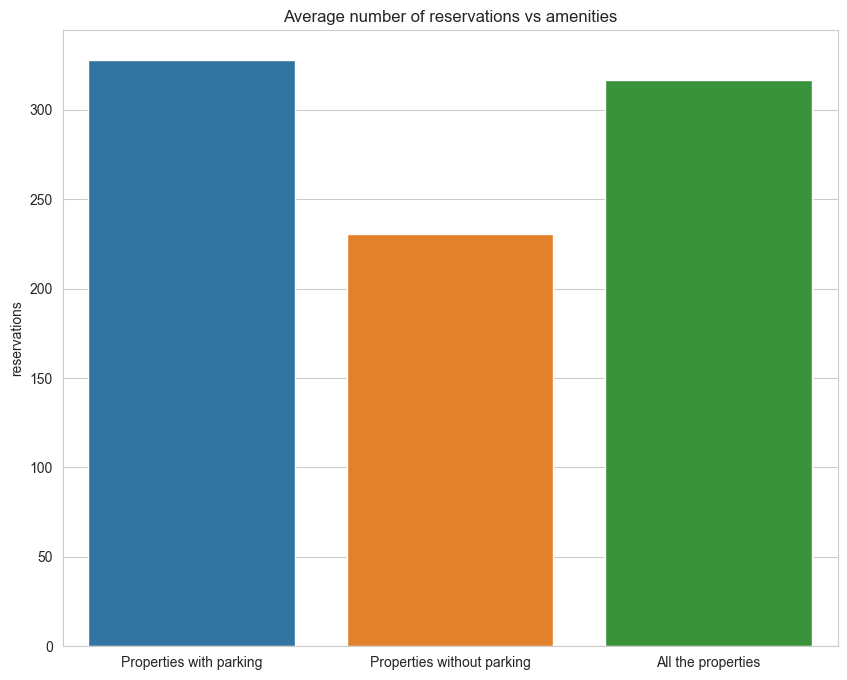

In [968]:
bookings_values = [bookings_amenities,bookings_withoutamenities, bookings_all]
bookings_labels = ['Properties with parking','Properties without parking', 'All the properties']
plt.figure(figsize=(10,8))
sns.barplot(x=bookings_labels, y=bookings_values)
plt.title("Average number of reservations vs amenities")
plt.ylabel("reservations")

Now we can observe that properties with a parking facility, which is an essential requirement for many travelers, have higher numbers compared to those with a pool, which does not seem to be a significant factor in attracting bookings. Personally I always check if the book have parking available, is a must.

In [ ]:
#Price vs Amenities

In [970]:
df_amenities_col = df_amenities_col.melt(id_vars='price', value_vars=amenities_col, var_name='amenities', value_name='dummy')

In [989]:
df_amenities_col = df_amenities_col[df_amenities_col['dummy'] == 1]

In [988]:
df_amenities_col

price       amenities  dummy
0      157.0  alarm_amenitie    1.0
1      150.0  alarm_amenitie    1.0
2      150.0  alarm_amenitie    1.0
3      110.0  alarm_amenitie    1.0
4      350.0  alarm_amenitie    1.0
...      ...             ...    ...
59104  800.0   pool_amenitie    1.0
59106  155.0   pool_amenitie    1.0
59119  968.0   pool_amenitie    1.0
59128  350.0   pool_amenitie    1.0
59133   48.0   pool_amenitie    1.0

[32611 rows x 3 columns]

In [991]:
df_amenities_col.groupby('amenities').count()

price  dummy
amenities                      
alarm_amenitie      5703   5703
backyard_amenitie   1745   1745
coffee_amenitie     4323   4323
dryer_amenitie      5463   5463
grill_amenitie      1073   1073
material_amenitie    878    878
parking_amenitie    5239   5239
pool_amenitie        937    937
water_amenitie      4852   4852
wine_amenitie       2398   2398

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 1000.0)

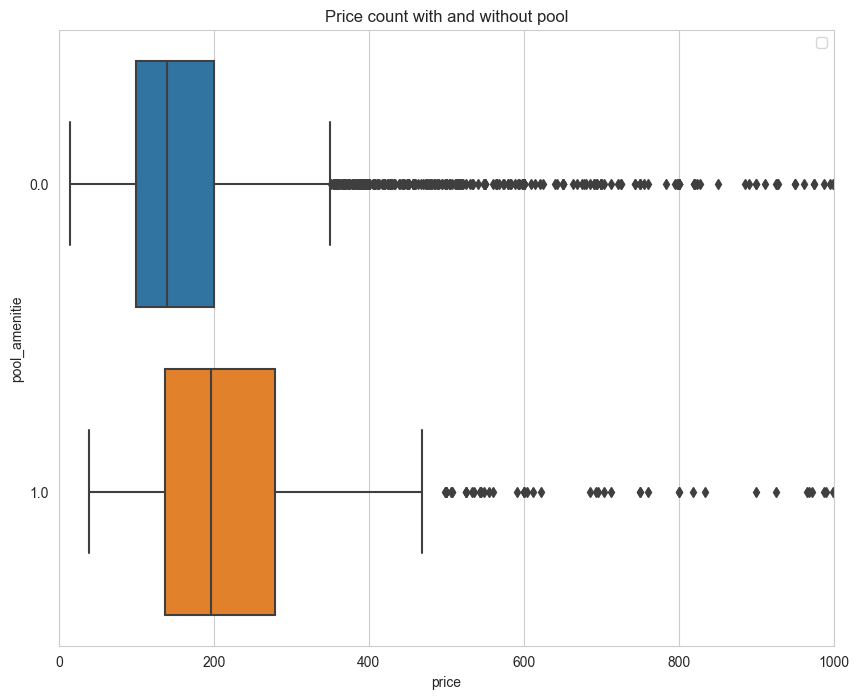

In [1007]:
df_with_amenities = dv[dv['pool_amenitie']==1]
df_without_amenities = dv[dv['pool_amenitie']==0]
plt.figure(figsize=(10,8))
sns.boxplot(x='price', y=dv['pool_amenitie'].astype('category'), data=dv)
plt.title('Range of price with and without pool')
plt.legend()
plt.xlim(0,1000)

It is not surprising that having a pool may result in an increase in the price range, even with only 15% of properties offering it.

In [ ]:
#Training Model

Even though my main motivation for this project is to showcase my abilities, I aim to treat it as a proper data analyst project. I am interested in training a model and evaluating its performance in making predictions. Let's proceed and assess how well it performs.

In [1256]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [ ]:
dv['host_since'] = dv['host_since'].dt.year.astype(int)
dv['last_review'] =dv['last_review'].dt.year.astype(int)
dv['first_review'] = dv['first_review'].dt.year.astype(int)

In [1266]:
X = dv.drop(['price','bookings'],axis=1)
y = dv['price']

In [1267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [1269]:
lr_model = LinearRegression().fit(X_train, y_train)

In [1270]:
print("R^2 for training set:: ", lr_model.score(X_train, y_train))
print("R^2 for test set: ", lr_model.score(X_test, y_test))

R^2 for training set::  0.02766119175191195
R^2 for test set:  0.09180563912075201


In [1271]:
# ajustar modelo de regresión polinomial de grado 2
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression()).fit(X_train, y_train)

In [1272]:
print("R^2 for training set: (polinomial): ", poly_model.score(X_train, y_train))
print("R^2 for test set (polinomial): ", poly_model.score(X_test, y_test))

R^2 for training set: (polinomial):  0.03529736609601919
R^2 for test set (polinomial):  -0.1154011189725268


Overall, these results suggest that the models do not fit the data well and are not very useful for making accurate predictions on new data sets

Thank you for joining me on this journey. I welcome any suggestions, ideas or alternative approaches to classifying and engineering data. It is truly fascinating to explore the many avenues available and witness the transformation of data along the way, gaining new insights and finding innovative ways to present it to the world. I firmly believe that, as a data analyst, it's all about making the details count and magnifying them as if looking through a lens to tell compelling stories.
Sergio O. 